<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/PracticaKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Generamos un dataset de ejemplo con 300 puntos distribuidos en 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.75, random_state=42)

# Creamos un DataFrame para almacenar los datos
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Cluster'] = y

# Guardamos el DataFrame en un archivo CSV
df.to_csv('custom_dataset.csv', index=False)

print("Dataset creado y guardado como 'custom_dataset.csv'")


Dataset creado y guardado como 'custom_dataset.csv'


In [7]:
df.head()


,Feature1,Feature2,Cluster
0,-9.182848,6.686140,3
1,-9.483638,7.035106,3
2,-1.892289,8.098653,0
3,-7.042888,-6.056027,2
4,-10.366921,6.567458,3


In [8]:
# Definir las características (X) y las etiquetas (y)
X = df[['Feature1', 'Feature2']].values
y = df['Cluster'].values

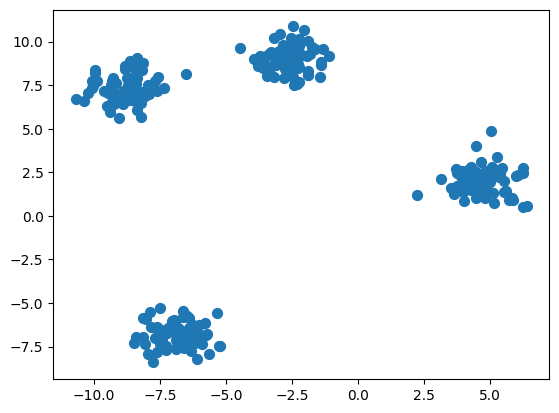

In [9]:
# Visualizamos los datos generados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [14]:
from sklearn.cluster import KMeans

# Creamos el modelo de KMeans con 3 clusters
kmeans = KMeans(n_clusters=4)

# Ajustamos el modelo a los datos
kmeans.fit(X)

# Obtenemos las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Obtenemos las etiquetas asignadas a cada punto (qué cluster pertenece cada punto)
labels = kmeans.labels_
# Calculamos el coeficiente de silueta con 4 clusters
sil_score = silhouette_score(X, labels)

print(f'Coeficiente de silueta con 4 clusters: {sil_score}')

Coeficiente de silueta con 4 clusters: 0.844075891992081


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


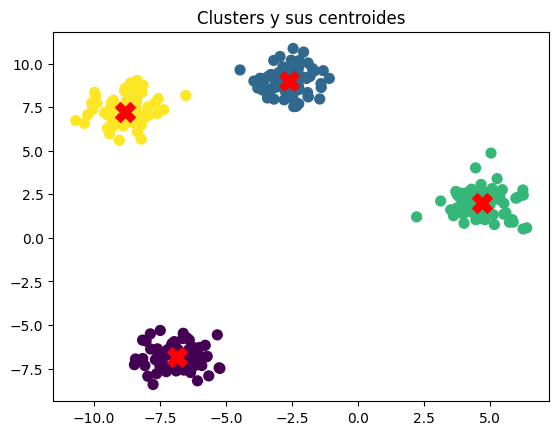

In [15]:
# Visualizamos los clusters y los centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')  # Puntos coloreados por cluster
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Centroides en rojo
plt.title("Clusters y sus centroides")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

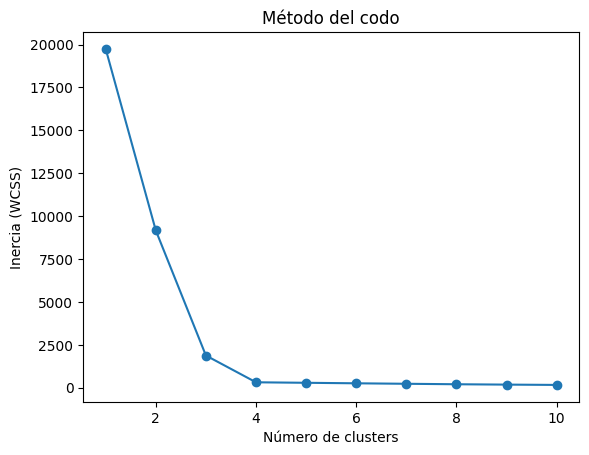

In [16]:
# Lista para almacenar la inercia (WCSS) para cada número de clusters
inertia = []

# Probamos diferentes números de clusters, por ejemplo, de 1 a 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (WCSS)')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

# Aplicamos KMeans con el número de clusters óptimo (por ejemplo, 3 si el método del codo lo sugirió)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# Calculamos el coeficiente de silueta
sil_score = silhouette_score(X, labels)

print(f'Coeficiente de silueta: {sil_score}')


Coeficiente de silueta: 0.7835431601525509


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
